In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
##We load the requisite repositories for running our codes

**What is hypothesis testing?** <br> Hypothesis testing is a statistical technique where you make mutually exclusive statements about the population and test which of these statements are true. These mutually exclusive statements are called **Null** and **Alternate** Hypothesis. 

**What is null and alternate hypothesis?** <br> These are essentially the claims you make about the population and end up testing. Null Hypothesis is also called status-quo or research hypothesis. Example in our case Null Hypothesis will be *Smoking Causes Cancer* or *New Medicine leads to lower sugar levels*. Alternate hypothesis by definition will be a mutually exlusive event *Smoking doesn't cause cancer* or *New medicine doesn't reduce sugar levels*. 

**Null hypothesis is represented as H0** and **Alternate hypothesis is represented by H1**

---

Some more statistical examples of hypothesis testing can be: <br>
a. Men are taller than women in general. **H0**: Average height of Men >= Average Height of Women **H1**: Average Height of Men < Average Height of Women
<br>b. Average number of stars in Galaxy is $10^{100}$ Stars. **H0**: Galaxy has $10^{100}$ Stars. **H1**: Galaxy doesn't have $10^{100}$ Stars. 
<br> *Simple enough? This will start getting technical soon.*

---
As you would've guessed first step in performing any hypothesis is creating a Null and Alternate Hypothesis. Null hypothesis can be of the following categories:

**a. Status Quo** - When you are trying to disprove a claim. (Say a smoker friend tells you Smoking doesn't cause cancer and you want to disprove the "status-quo" knowledge that smoking indeed causes cancer). 

**b. Researcher** - You have done some research and want to establish the veracity of the same. (Say you came up with a medicine which reduces blood sugar level and you want to proove it indeed does it)
<br>

**What is the need for hypothesis testing?**
We generally don't have access to the Population data and therefore saying anything with certainity is impossible about the population. For instance in two examples we took above:
> We will not have access to data of all smokers to establish the claim with certainity

> We will not be able to administer your test medicine to entire population. (May be not even to a single person)

Then how do we solve the above challenges? The answer is Hypothesis Testing. In this approach we take a sample which is representative of the population and do our tests and conclude if our hypothesis is true or not. 
How to do it? We will come to that soon, before that we need to understand some fundamentals about the hypothesis testing approach. 

### A simple example of Hypothesis Testing
Let us take a very simplified example of hypothesis testing. Say our friend Sujeet claims that he can predict an outcome of a coin toss. You being a believer in science and logic do not agree to his claim. So you start testing his claim.

You toss a coin and Sujeet ends up guessing the correct answer in $1^{st}$ guess. What do you think the probability of this is? <br> 
50%

Probability of correct $2^{nd}$ guess is (1/2)X(1/2) = 0.25.
<br> Probability of correct $n^{th}$ guess is $(1/2)^{n}$

<br> Probability graph for 20 successful guesses is given below:


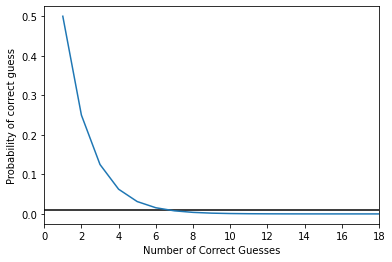

In [2]:
n = np.array(range(1,20,1)) #Range gives a list of integers between 1 & 20 with a gap of 1
k = (1/2)**n
ax = plt.subplot() #We create a pyplot object to display our graph
plt.xlabel("Number of Correct Guesses")
plt.ylabel("Probability of correct guess")
plt.xlim(0,18)
plt.axhline(y = 0.01,color='black') #For having 0.01 probability of correct guess the number of guesses required is close to 7
plt.plot(n,k) #Here we plot n vs Probability
plt.show()

##What does this code do?
#This code generates a series of integers between 1 and 20 which are essentially the number of correct guesses and
#then we compute the probability associated with each integral guess in line 2 we are using list comprehension capabilities
#of python where when a scalar operation is used on a list entire list gets that scalar operation implemented
#Then we plot the graph of our data xlabel, ylabel, xlim & axhline are parameters of pyplot library used for plotting data

Now with each correct guess your doubt on Sujeet starts reducing. First guess you were sure (almost) that there is a 50% chance his claims were incorrect.
<br> With second, third, fourth etc your doubt starts dwindling. 
<br> Here your **Null Hypothesis is: Sujeeth's claim is wrong** and **Alternate Hypothesis is: Sujeet's claim is correct.**
<br> As he starts predicting the coin tosses, with $10^{th}$ guess the chance of anyone doing it correctly is 0.097%. 
<br> So your decision to question Sujeet's claim starts loosing its veracity with every correct guess and by $10^{th}$ guess the probability of Sujeet being able to predict all tosses correctly is so low that you start questioning your Null Hypothesis.
<br> This crude example shows how any of the Hypothesis tests work, you decide upon your belief - which is formulated in form of Null and Alternate Hypothesis (*these have to be mutually exclusive statements*) and then start testing with the data available and reject one of them basis the probability observed in the experiment. 

## Formalizing Hypothesis Testing
In this section we try to extend our basic idea of Hypothesis testing by formalizing the process for statistical testing. Before we do that we need to understand a few key topics:
 - Sample and Population Parameters
 - Central Limit Theoram
 - Sampling Techniques
 
### Sample and Population Parameters
Whenever we do a statistical test we want to be sure that it holds true for every-one (in general). Which essentially means we want to be sure that the computed result holds true for the entire population. For example if you want to test how many people like cheese burst pizza, you would want to do a survey for entire country and compute say 30% of people like cheese burst pizza. 
<br> However, that endeavour will be an extremely costly one even if you try to do an online survey. Therefore we generally try to take a sample which is representative of the population (in this case people who eat pizza) and calculate % of people who like cheese burst pizza. 
<br> As we increase the size of our sample our estimate of sample starts approaching population. 

**Question: Imagine you do a survey for 100 people and you get 30% people liking cheese burst against 200 people surveyed by your friend who gets a result of 45%. What will you attribute this difference to?**
1. Due to difference in the samples taken by you and your friend?
2. Due to people liking cheese burst increasing between your survey and your friend's survey?

### Central Limit Theoram
Central Limit Theoram (CLT) is essentially the most important statistical theoram. The ***style statement*** of CLT is:
<br>***Numbers extracted out of large number of random draws start following normal distribution***
<br> Let us take an example to demonstrate this. In a roll of dice the probability of getting a number from 1 - 6 is equal which is 1/6. Now if you have two dices and you try to tabulate number of combinations which can get you a particular sum say 2. As you would have guessed there is only one way to get a sum of 2 which is (1,1). 
<br> Similarly for 4 there are 3 possible outcomes (2,2), (1,3), (3,1). 
<br> The sum of outcome of two dices ranges between 2 & 12. We will write a code to create a frequency table and graph of number of cases against each outcome. 

[1 2 3 4 5 6]


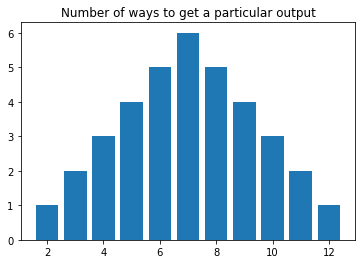

In [3]:
dice_output = np.array(range(1,7,1)) #Output possible from a single dice
print(dice_output) 
count_dict = {} #Creating a key value pair for each outcome
for i in range(2,13,1): #Our possible outcomes are between 1 & 12 (Python indexes on n-1 basis therefore for 12 outputs we use 13)
    val_test = [i]*6
    val_test = val_test - dice_output
    count = len(list(filter(lambda x: (x>0 and x<=6),val_test))) #Google lambda functions they are part of list comprehension
    count_dict[i] = count
counts = list(count_dict.keys())
values = count_dict.values()
plt.bar(counts,values)
plt.title("Number of ways to get a particular output")
plt.show()
#What does this code do?
#This code uses a simple algorithm to compute number of possible outcomes if we do a sum - values possible any number greater than 0 and less than 7
#is the number of possible counts.

In [4]:
def count(n,k,target):
    if n == 0:
        return 1 if (target == 0) else 0
    if target < 0 or k*n < target or n > target:
        return 0
    result = 0
    for i in range(1,k+1):
        result+=count(n-1,k,target - i)
    return result

As we can see with number of dice = 2 we saw a frequency curve which is symmetric. However, when we start increasing the number of iterations from 4 - 10 in below graphs the shape of graph becomes closer to bell curve. 
<br>**This is the fundamental premise of CLT as the number of random draws increases the frequency distribution starts approaching normal curve**

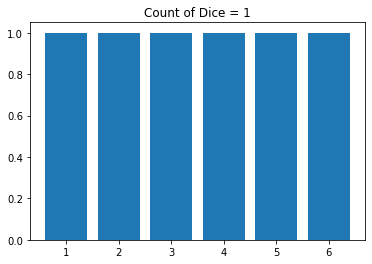

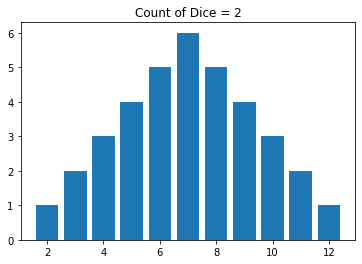

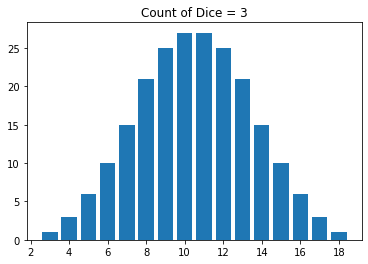

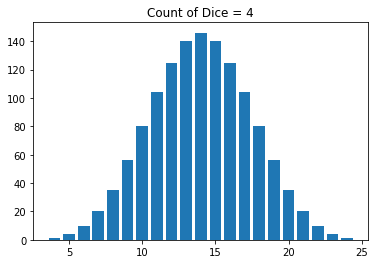

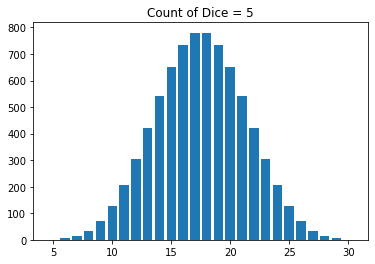

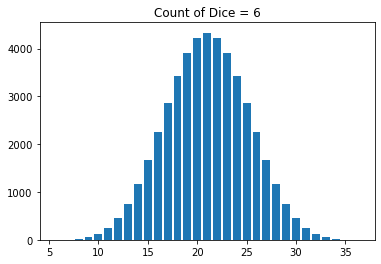

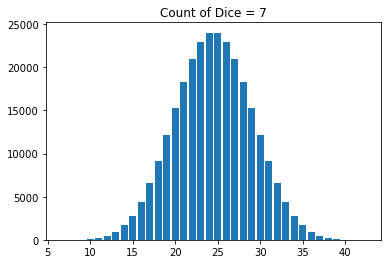

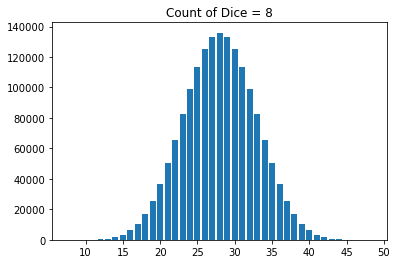

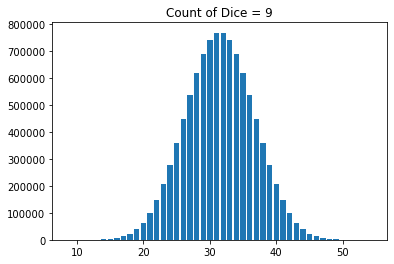

In [5]:
count_dict = {}

for n_dice in range(1,10):
    count_dict = {}
    for output in range(n_dice,6*n_dice+1):
        count_dict[output] = count(n_dice,6,output)
    plt.bar(list(count_dict.keys()),count_dict.values())
    plt.title(f"Count of Dice = {n_dice}")
    plt.show()
    

In [24]:
zeros = np.zeros(1000000)
ones = np.ones(10000)
comb = np.concatenate((zeros,ones))
prop = []
for i in range(1,10000):
    prop.append(sum(np.random.choice(comb,1000))/1000)
    

Text(0.5, 1.0, 'Distribution of proportions of 1s in random samples')

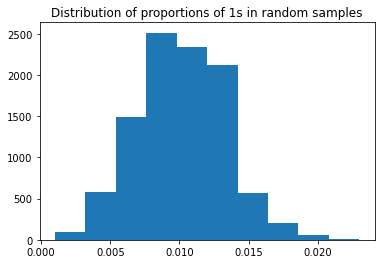

In [25]:
plt.hist(prop)
plt.title("Distribution of proportions of 1s in random samples")

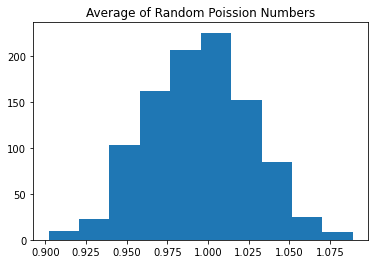

In [31]:
a = np.random.poisson(lam = 1, size=100000)
rand_sum = []
for i in range(1,1000):
    rand_sum.append((np.random.choice(a,1000).mean()))
plt.hist(rand_sum)
plt.title("Average of Random Poission Numbers")
plt.show()

We start with 1 dice the distribution is **Uniform** as we increase the number of dice the distribution starts approaching **Normal**. Thus we have deviced a normal distribution from a seemingly uniform distribution and this is the fundamental premise of CLT.
<br> Formalizing the same we can say if a 
<br> *Random variable follows any distribution (Poission, Uniform, or any other) if we do n trials X1, X2, X3 .... Xn as n increases the 
<br> sum S = X1 + X2 + X3 + X4 + .... Xn starts approaching Normal Distribution.*
Which we just proved in the demonstration of dice throw above. 
<br> Given we have proved S = $X_{1}$ + $X_{2}$ + $X_{3}$ + ...+ $X_{n}$ is normally distributed =>  $\frac{1}{n}$  ($X_{1}$ + $X_{2}$ + $X_{3}$ + ...+ $X_{n}$) should also be normally distributed and that is one of the core principles we will be using in Hypothesis Testing. 

This is the first postulate of Central Limit Theoram. There is **one more important result** of CLT which we will cover soon. 

### Sampling Techniques
In previous sections we got introduced to CLT and Sample & Population Parameters. In this section we will very briefly cover the sampling techniques. As we know sampling is required to provide a ***representative*** picture of the population, a pertinent question to ask is how to do sampling. Some of the commonly known sampling techniques are:
1. Random Sampling - Where samples are chosen randomly from the desired population
2. Systematic Sampling - Where we choose every $n^{th}$ element from the population
3. Cluster Sampling - Where we create clusters of possible population sets and choose elements randomly from there
4. Stratified Sampling - We sub-divide the population into stratas (eg. Demographics) and choose samples from these stratas

### Second important Result of Hypothesis Test
Now that we have covered Sampling techniques in brief we will cover next important postulate of CLT, which helps in formalizing the hypothesis testing frameworks and also gives the mathematical background to the test statistics. 
In one line this important postulate of CLT states:
<br> **The mean of samples extracted from any population has a Normal Distribution with mean = Population Mean and Standard Deviation = $\sigma/ \sqrt n$ , where $\sigma$ is the population standard deviation**

There is a lot of mathematical background behind this statement which we will not cover here, you can refer to other notebook (WIP) for that requirement. However, for our further section on Test Statistics and Hypothesis testing this much theoritical background should suffice. 

### Various type of test statistics
In this section we will cover main type of test-statistics which can be used for various scenarios. Main test-statistics which we will be covering are:
- Z test
- Chi-Square Test
- T test
- ANOVA
- Linear Regression

#### Z Test
Z tests are used whenever the variable we are testing is normally distributed (***Note: Here the population doesn't have to be distributed normally, we are talking about test-statistics which as per our previous discussion is indeed normally distributed as per CLT***).
<br> A little bit of recap will help. 
<br> **NULL HYPOTHESIS** ($H_{0}$): Status Quo or Research Test
<br> **ALTERNATE HYPOTHESIS** ($H_{1}$): Mutually exclusive event against $H_{0}$

Taking an example here: 
<br>$H_{0}$: Does eating appdle a day doesn't keep the doctor away (status quo)
<br>$H_{1}$: Eating an apple every day keeps the doctor away 
<br> Excuse my sense of humor for adding this hypothesis. Hope this helps you remember null and alternate better.

Another thing which you can think: Say a company is launching a new gaming mouse and it increases your performance in a game significantly. (Measure of performance of game is say your score). Let $\mu$ be the average increase in score. 
<br>Then Null Hypothesis will be: $\mu$ = 0 (i.e no change in the score after using the mouse)

What we essentially do is
- Formulate the Null and Alternate Hypothesis
- Calculate data from Samples
- Measure Statistics (In this step you are trying to answer the question **If null hypotheiss were true how extreme is my sample** if too extreme you reject null if not you do not reject null. - more on this in subsequent sections

To take an example say you take two samples for people eating an apple and compute average number of days without visiting the doctor:
- **Sample 1** - Number of days without going to doctor 10
- **Sample 2** - Number of days without going to doctor 360
Obviously our sample 2 is extreme enough to say Null is incorrect. 
<br> Similarly in our first example after 10 correct guesses we were in a position to doubt/ reject our null hypothesis of Sujeet's correct guesses are merely due to luck. 

##### Impact of Sample Size
While there is one factor of the quantum of the distance between actual value and measured value. There is one more factor how large the sample is. Say a sample with 2 people who haven't gone to doctor for 360 days v/s Sample with 100 people who have not gone to the doctor, sample with 100 people supports our rejection of null hypothesis more strongly. 

Given this knowledge we formalize the test statistics:

$\large Z = \frac{(\bar x - \mu)}{\frac{\sigma}{\sqrt{n}}}$

- $\bar x$ is the Sample mean
- $\mu$ is the population mean against which we are testing
- $\sigma$ is the population variance which we assume we know
- n is the number of items in Sample

To take a numerical example say we are testing average height of males is 5 Feet. So our formalization of Hypothesis will be:
<br>$H_{0}$: $\large \mu = 5$ 
<br>$H_{1}$: $\large \mu \neq 5$

<br> If we take a sample of say 100 men and the average height of these people is say 7 Feet (Mostly men from Netherlands: Netherlands has the tallest people in the world on an average with average male height 6 Feet and female height 5.55 feet). And we know standard deviation for population is 2 feet. 
<br>Then:
- $\large \bar X = 7 $ 
- $\large n = 100$
- $\large \sigma = 2$

For sample of 100 and knowing 7 Feet is kind of extreme height we might be in a position to reject the null hypothesis. 
<br> While this might make sense in this example or in case of Sujeet's guessing game example where we know probability of observing this extreme is low. However, in order to formalize our argument we need some more mathematical tools which we will cover now. 

*Note* Expression for Z above increases in value as n increases and also increases in value if the distance between $\bar x$ and $\mu$ increases. Which means it has the potential to give extreme values if the Null Hypothesis is not supported by the sample.
<br> How do we define *what is extreme?* *what is not extreme enough?* fort this we will need one more tool called **P-Values** before jumping into the concept of P-value we will have a brief discussion about what exactly does a normal curve measure.

### Z Value and Z Curve 
Z Curve is a symmetric curve. Every normal distribution will have a symmetrical shape around the mean, in order to achieve easier calculation (Not required with current computers) we convert the normal curves into Z-Curve which have a $\large \mu = 0$ and $\large \sigma = 1$.
<br> Therefore the form of conversion is: $\large \frac {(\bar X - \mu)}{\sigma}$

In [35]:
print(norm.cdf(0,0,1))

0.5


Let us understand the code above. 
- We are creating x-values which will be used to compute the probability of that particular point happening in the data
- Next we compute mean and std of the distribution we will use same STD and MEAN of the data
- We use PDF of normal distribution to compute the probability 
    - PDF of a Normal Distribution is given as $ \large f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^\frac{-(x-\mu)^2}{2\sigma^2}$
- This PDF computes probability of x taking a particular value given $\mu$ and $\sigma$
<br>**Note**: In case of continuous distributions $\large f(X=x)$ does not make sense we generally calculate PDFs in a range. Meaning a continuous probability distributions do not take a particular value they are relevant over a range of values. 
<br> To compute say a Normal distribution taking a value $\leq$ a particular value is given by the CDF (Cumulative Distribution Function). 
<br> Example: If we want to compute what is probability of a Standard Normal variable taking value $\leq$ 0. This doesn't require you to compute anything as we can see from the graph Standard Normal curve is symmetric about mean (Zero in this case) and total area under normal curve is 1. Means the probability of a normal curve taking value $\leq$ 0 is 50%. 
<br> Which we computed using ```norm.cdf(0,0,1)``` where 0 is the value for which we are computing probability second 0 is the mean of the distribution and 1 is the standard deviation. 
<br> In order to compute probability value between two x values i.e say we want to know what is the probability x will take value between 2 and 0, will be given by ```norm.cdf(2,0,1) - norm.cdf(0,0,1)``` which is around 48%. 

<br> Below is the standard representation of the Normal Distribution. 


<img src="Screenshot%202022-03-10%20175554.png" width="600">


In [40]:
norm.cdf(2,0,1) - norm.cdf(0,0,1) ##Computing proability value between 0 and 2
norm.ppf(0.95)

1.6448536269514722

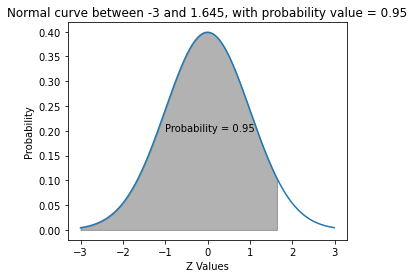

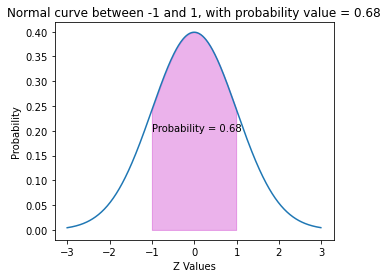

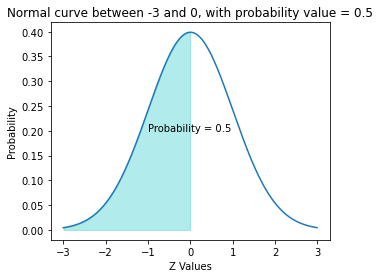

In [50]:
def plot_normal(x_min,x_max):
    mu = 0
    sigma = 1
    color = ['b','r','g','c','m','y','k']
    x_axis = np.arange(mu - 3*sigma ,mu+3*sigma,0.01)
    fill_area = np.arange(x_min,x_max,0.01)
    fill_pdf = norm.pdf(fill_area,0,1)
    mean = x_axis.mean()
    std = x_axis.std()
    pdf_x_axis = norm.pdf(x_axis,0,1)
    fig,ax = plt.subplots(figsize = (5,4))
    ax.fill_between(fill_area,fill_pdf,0,alpha = 0.3,color = np.random.choice(color))
    plt.title(f"Normal curve between {np.round(x_min,3)} and {np.round(x_max,3)}, with probability value = {np.round(norm.cdf(x_max)-norm.cdf(x_min),2)}")
    plt.plot(x_axis, pdf_x_axis)
    #plt.text(3,2,"Hello")
    plt.xlabel("Z Values")
    plt.ylabel("Probability")
    ax.annotate(f"Probability = {np.round(norm.cdf(x_max)-norm.cdf(x_min),2)}",(-1,+0.2),color='black',size = 10)
    plt.show()

plot_normal(-3,norm.ppf(0.95)) ##Probability curve for 95% probability left tailed
plot_normal(-1,1) ##Probability curve between -1 and 1
plot_normal(-3,0) ##Probability curve between min and 0
#As we have plotted this curve with mean = 0 and std = 1 means this is also a standard normal distribution. 
#This curve gives the CDF of 95% means the value <=1.64 = 95%
#In second plot we have plotted area between -1 to +1

In [72]:
?plt.text

In [ ]:
##Notebook created by Mudit Sharma information sourced from multiple sources